## A5Pandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/02_a5.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [1]:
# %pip install vgridpandas

### Latlong to A5

In [2]:
import pandas as pd
from vgridpandas import a5pandas
df = pd.read_csv('https://github.com/uber-web/kepler.gl-data/raw/master/nyctrips/data.csv')
df = df.head(100)
df = df.rename({'pickup_longitude': 'lon', 'pickup_latitude': 'lat'}, axis=1)[['lon', 'lat', 'passenger_count']]
resolution = 16
df = df.a5.latlon2a5(resolution)
df.head()

,lon,lat,passenger_count,a5_res
a5,,,,
2610738938000000,-73.993896,40.750111,1,16
2610762d18000000,-73.976425,40.739811,1,16
26107685e8000000,-73.968704,40.754246,5,16
26107bde88000000,-73.863060,40.769581,5,16
2610730008000000,-73.945541,40.779423,1,16


### A5 to geo boundary

In [3]:
df = df.a5.a52geo()
df.head()

,lon,lat,passenger_count,a5_res,geometry
a5,,,,,
2610738938000000,-73.993896,40.750111,1,16,"POLYGON ((-73.9936 40.74975, -73.99276 40.7499..."
2610762d18000000,-73.976425,40.739811,1,16,"POLYGON ((-73.97742 40.73934, -73.97652 40.739..."
26107685e8000000,-73.968704,40.754246,5,16,"POLYGON ((-73.96812 40.75402, -73.96727 40.754..."
26107bde88000000,-73.863060,40.769581,5,16,"POLYGON ((-73.86343 40.76952, -73.86252 40.769..."
2610730008000000,-73.945541,40.779423,1,16,"POLYGON ((-73.9443 40.77974, -73.94521 40.7797..."


### (Multi)Linestring/ (Multi)Polygon to A5

<Axes: >

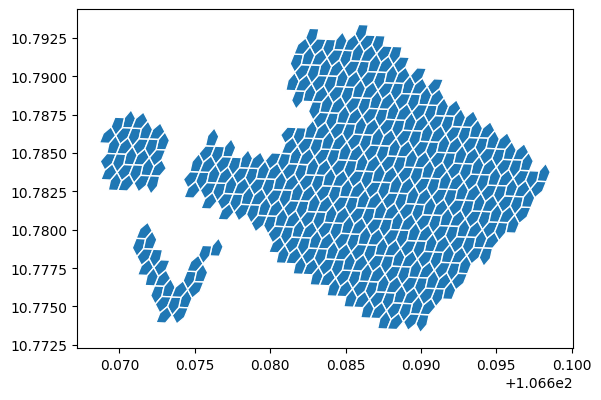

In [4]:
import geopandas as gpd
from vgridpandas import a5pandas
gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 16
gdf_polyfill = gdf.a5.polyfill(resolution, compact = False, predicate = "intersects", explode = True)
gdf_polyfill.head()
gdf_polyfill = gdf_polyfill.a5.a52geo("a5")
gdf_polyfill.plot(edgecolor = "white")

### A5 point binning

<Axes: >

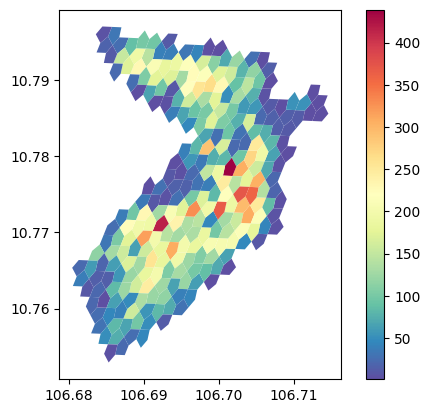

In [5]:
import pandas as pd
import geopandas as gpd
from vgridpandas import a5pandas
resolution = 15
df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
# df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
stats = "count"
df_bin = df.a5.a5bin(resolution=resolution, stats = stats, 
                    # numeric_column="confidence",
                    # category_column="category",
                    return_geometry=True)
df_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)